
The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine. The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.

#Que 1 - Predicting turbine energy yield (TEY) using ambient variables as features.

Dataset=gas_turbines

In [289]:
#import library:-

In [290]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.wrappers.scikit_learn import KerasRegressor
from keras.layers import Dense,Dropout
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import GridSearchCV,KFold
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam,RMSprop

In [291]:
import warnings
warnings.filterwarnings('ignore')

In [299]:
#Import Data:-

In [300]:
turbines_data = pd.read_csv('gas_turbines.csv')
turbines_data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [301]:
#Data Understanding:-

In [302]:
turbines_data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [303]:
turbines_data.shape

(15039, 11)

In [304]:
turbines_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [305]:
turbines_data.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [306]:
turbines_data.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [307]:
turbines_data.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [329]:
turbines_data[turbines_data.duplicated()]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,TEy


In [330]:
#Correlation Matrix :-

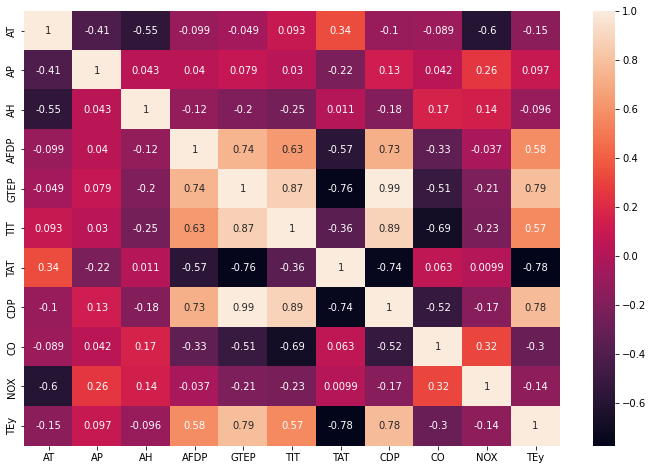

In [331]:
plt.figure(figsize = (12,8))
sns.heatmap(turbines_data.corr(),annot = True)
plt.show()

In [332]:
# Visualization using distplot :-

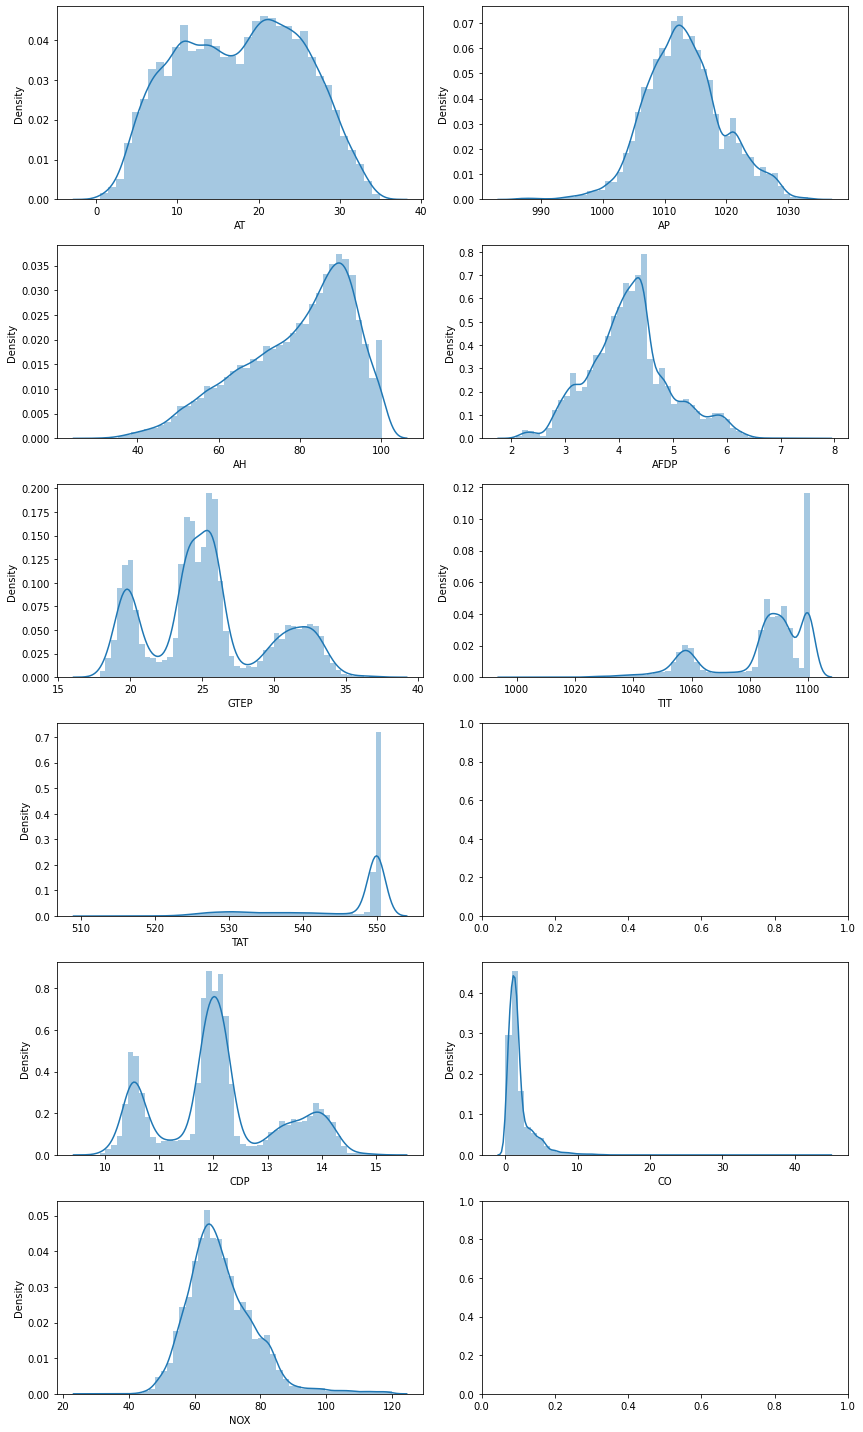

In [335]:
fig, ax = plt.subplots(6,2, figsize = (12,20))

sns.distplot(turbines_data.AT, ax = ax[0,0])
sns.distplot(turbines_data.AP, ax = ax[0,1])
sns.distplot(turbines_data.AH, ax = ax[1,0])
sns.distplot(turbines_data.AFDP, ax = ax[1,1])
sns.distplot(turbines_data.GTEP, ax = ax[2,0])
sns.distplot(turbines_data.TIT, ax = ax[2,1])
sns.distplot(turbines_data.TAT, ax = ax[3,0])
sns.distplot(turbines_data.CDP, ax = ax[4,0])
sns.distplot(turbines_data.CO, ax = ax[4,1])
sns.distplot(turbines_data.NOX, ax = ax[5,0])

plt.tight_layout()
plt.show()

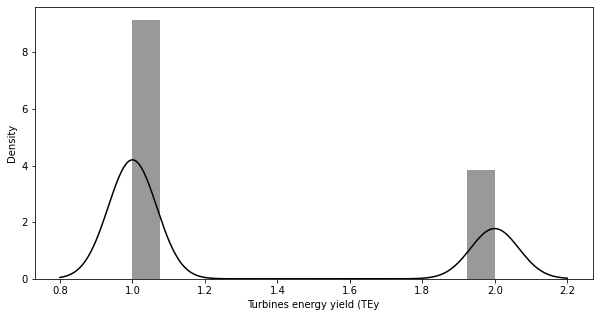

In [342]:
plt.figure(figsize=(10,5))
sns.distplot(x = turbines_data['TEy'],axlabel='Turbines energy yield (TEy',color='black')
plt.show()

In [343]:
#Checking of the outlier :-

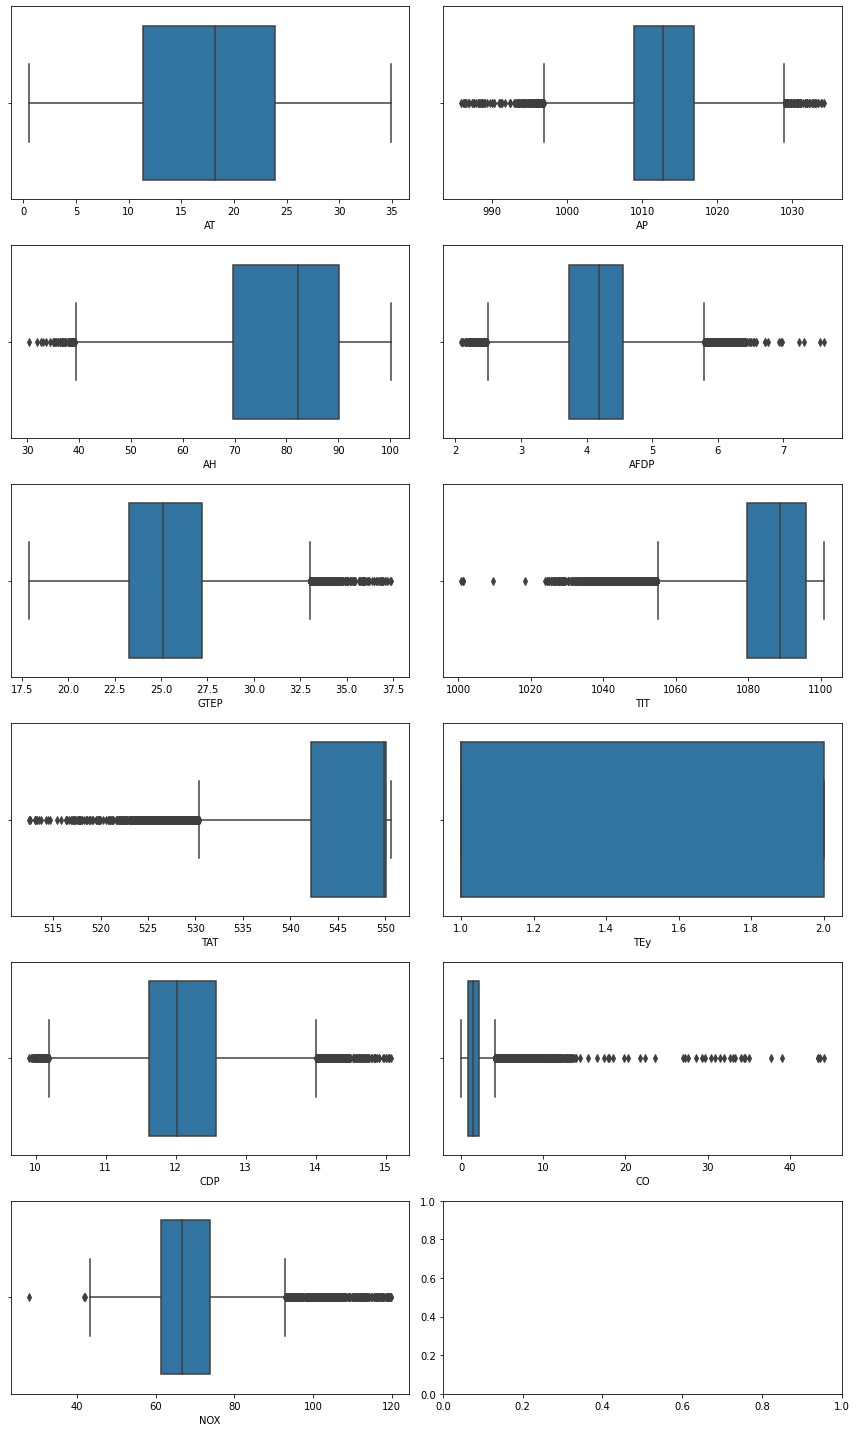

In [344]:
fig, ax = plt.subplots(6,2, figsize = (12,20))

sns.boxplot(turbines_data.AT, ax = ax[0,0])
sns.boxplot(turbines_data.AP, ax = ax[0,1])
sns.boxplot(turbines_data.AH, ax = ax[1,0])
sns.boxplot(turbines_data.AFDP, ax = ax[1,1])
sns.boxplot(turbines_data.GTEP, ax = ax[2,0])
sns.boxplot(turbines_data.TIT, ax = ax[2,1])
sns.boxplot(turbines_data.TAT, ax = ax[3,0])
sns.boxplot(turbines_data.TEy, ax = ax[3,1])
sns.boxplot(turbines_data.CDP, ax = ax[4,0])
sns.boxplot(turbines_data.CO, ax = ax[4,1])
sns.boxplot(turbines_data.NOX, ax = ax[5,0])

plt.tight_layout()
plt.show()

In [345]:
#Model Building::-

In [346]:
x = turbines_data.drop(labels='TEy',axis=1)
y = turbines_data[['TEy']]

In [347]:
x

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227


In [348]:
y

,TEy
0,1
1,1
2,1
3,1
4,1
...,...
15034,1
15035,1
15036,1
15037,1


In [349]:
#Covert input data in standard form
sclar = MinMaxScaler()
scale_data = sclar.fit_transform(x)
scale_data

array([[0.18418215, 0.45604964, 0.95131413, ..., 0.1353398 , 0.07152212,
        0.59654817],
       [0.18201978, 0.4663909 , 0.95588067, ..., 0.13398756, 0.07337235,
        0.59713433],
       [0.18529531, 0.47466391, 0.93900309, ..., 0.13456709, 0.07257648,
        0.59379104],
       ...,
       [0.19596183, 0.4229576 , 0.98992213, ..., 0.11177221, 0.18055195,
        0.68544912],
       [0.18844295, 0.43329886, 0.98293633, ..., 0.12143106, 0.14169257,
        0.71057802],
       [0.18617304, 0.44157187, 0.96182146, ..., 0.1310899 , 0.11294597,
        0.70266486]])

In [350]:
x_train,x_test, y_train, y_test = train_test_split(scale_data,y,test_size=0.30,random_state=12)

In [351]:
x_train.shape,y_train.shape

((10527, 10), (10527, 1))

In [352]:
x_test.shape,y_test.shape

((4512, 10), (4512, 1))

In [353]:
# Model Training ::-

In [354]:
#Turning Hyperparameter: Batch Size and epochs
def regression_model():
    model = Sequential()
    model.add(Dense(12, input_dim=10,kernel_initializer='uniform',activation='relu'))
    model.add(Dropout(0.2))   
    model.add(Dense(8 ,kernel_initializer='uniform',activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1,kernel_initializer = 'uniform',activation = 'sigmoid'))
    
    oppti = Adam(learning_rate=0.001)
    model.compile(loss='mean_squared_error',optimizer = oppti,metrics=['mae','mse'])
    return model

In [358]:
model1 = KerasRegressor(build_fn=regression_model, verbose=0)
batch_size = [10,50,100]
epochs = [40,70,100]
param_grid = dict(batch_size = batch_size,epochs = epochs)
gsv = GridSearchCV(estimator=model1, param_grid=param_grid, cv = KFold(),verbose=5)
grid_res = gsv.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END .........batch_size=10, epochs=40;, score=-0.300 total time=  41.9s
[CV 2/5] END .........batch_size=10, epochs=40;, score=-0.292 total time=  41.8s
[CV 3/5] END .........batch_size=10, epochs=40;, score=-0.272 total time=  34.5s
[CV 4/5] END .........batch_size=10, epochs=40;, score=-0.307 total time=  35.0s
[CV 5/5] END .........batch_size=10, epochs=40;, score=-0.314 total time=  41.9s
[CV 1/5] END .........batch_size=10, epochs=70;, score=-0.300 total time= 1.4min
[CV 2/5] END .........batch_size=10, epochs=70;, score=-0.292 total time= 1.4min
[CV 3/5] END .........batch_size=10, epochs=70;, score=-0.272 total time= 1.4min
[CV 4/5] END .........batch_size=10, epochs=70;, score=-0.307 total time=  59.5s
[CV 5/5] END .........batch_size=10, epochs=70;, score=-0.314 total time=  59.5s
[CV 1/5] END ........batch_size=10, epochs=100;, score=-0.300 total time= 2.0min
[CV 2/5] END ........batch_size=10, epochs=100;, 

In [365]:
print(grid_res.best_score_,grid_res.best_params_)

-0.2970458805561066 {'dropout_rate': 0.0, 'learning_rate': 0.1}


In [362]:
##Turning Hyperparameter: Learning rate and Dropout rate ::-

In [363]:
def regression_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(12, input_dim=10,kernel_initializer='uniform',activation='relu'))
    model.add(Dropout(0.2))   
    model.add(Dense(8 ,kernel_initializer='uniform',activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1,kernel_initializer = 'uniform',activation = 'sigmoid'))
    adam = Adam(learning_rate=learning_rate)
    model.compile(loss='mean_squared_error',optimizer=adam, metrics=['mae','mse'])
    return model

In [364]:
model = KerasRegressor(build_fn=regression_model,batch_size = 100,epochs = 40,verbose = 0)
learning_rate = [0.1,0.01,0.001]
dropout_rate = [0.0,0.1,0.2]
param_grid = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)
gsv = GridSearchCV(estimator= model, param_grid=param_grid, cv=KFold() ,verbose=5)
grid_res = gsv.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END dropout_rate=0.0, learning_rate=0.1;, score=-0.300 total time=   4.3s
[CV 2/5] END dropout_rate=0.0, learning_rate=0.1;, score=-0.292 total time=   5.8s
[CV 3/5] END dropout_rate=0.0, learning_rate=0.1;, score=-0.272 total time=   5.8s
[CV 4/5] END dropout_rate=0.0, learning_rate=0.1;, score=-0.307 total time=   5.8s
[CV 5/5] END dropout_rate=0.0, learning_rate=0.1;, score=-0.314 total time=   4.2s
[CV 1/5] END dropout_rate=0.0, learning_rate=0.01;, score=-0.300 total time=   4.1s
[CV 2/5] END dropout_rate=0.0, learning_rate=0.01;, score=-0.292 total time=   5.8s
[CV 3/5] END dropout_rate=0.0, learning_rate=0.01;, score=-0.272 total time=   5.8s
[CV 4/5] END dropout_rate=0.0, learning_rate=0.01;, score=-0.307 total time=   4.2s
[CV 5/5] END dropout_rate=0.0, learning_rate=0.01;, score=-0.314 total time=   4.3s
[CV 1/5] END dropout_rate=0.0, learning_rate=0.001;, score=-0.300 total time=   5.8s
[CV 2/5] END dropout

In [366]:
print(grid_res.best_params_,grid_res.best_score_)

{'dropout_rate': 0.0, 'learning_rate': 0.1} -0.2970458805561066


In [367]:
## Tuning of Hyperparameter :Activation Function & Kernel Initializer::-

In [368]:
def regression_model(activation_function,inti):
    model = Sequential()
    model.add(Dense(12, input_dim=10,kernel_initializer='uniform',activation='relu'))
    model.add(Dropout(0.0))   
    model.add(Dense(8 ,kernel_initializer='uniform',activation='relu'))
    model.add(Dropout(0.0))
    model.add(Dense(1,kernel_initializer = 'uniform',activation = 'sigmoid'))
    adam = Adam(learning_rate=0.1)
    model.compile(loss='mean_squared_error',optimizer=adam, metrics=['mae','mse'])
    return model

In [369]:
model = KerasRegressor(build_fn=regression_model,batch_size = 100,epochs = 40,verbose = 0)
activation_function = ['relu', 'tanh','softmax','linear']
inti = ['uniform', 'zero','normal']
param_grid = dict(activation_function = activation_function,inti = inti)
gsv_m = GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose = 5)
grid_resu = gsv_m.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END activation_function=relu, inti=uniform;, score=-0.300 total time=   4.1s
[CV 2/5] END activation_function=relu, inti=uniform;, score=-0.292 total time=   5.8s
[CV 3/5] END activation_function=relu, inti=uniform;, score=-0.272 total time=   5.8s
[CV 4/5] END activation_function=relu, inti=uniform;, score=-0.307 total time=   4.1s
[CV 5/5] END activation_function=relu, inti=uniform;, score=-0.314 total time=   5.8s
[CV 1/5] END activation_function=relu, inti=zero;, score=-0.300 total time=   5.8s
[CV 2/5] END activation_function=relu, inti=zero;, score=-0.292 total time=   4.1s
[CV 3/5] END activation_function=relu, inti=zero;, score=-0.272 total time=   4.0s
[CV 4/5] END activation_function=relu, inti=zero;, score=-0.307 total time=   4.1s
[CV 5/5] END activation_function=relu, inti=zero;, score=-0.314 total time=   4.0s
[CV 1/5] END activation_function=relu, inti=normal;, score=-0.300 total time=   4.3s
[CV 2/5] 

In [370]:
print(grid_resu.best_score_,grid_resu.best_params_)

-0.2970458805561066 {'activation_function': 'relu', 'inti': 'uniform'}


In [371]:
## Tuning of Hyperparameter :Number of Neurons in hidden layer ::-

In [372]:
def regression_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(12,input_dim = 10,kernel_initializer='uniform',activation='relu'))
    model.add(Dropout(0.0))
    model.add(Dense(8,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(0.0))
    model.add(Dense(1,kernel_initializer='uniform',activation= 'sigmoid'))
    adam = Adam(learning_rate= 0.1)
    model.compile(loss='mean_squared_error',optimizer=adam,metrics=['mae','mse'])
    return model

In [373]:
model = KerasRegressor(build_fn=regression_model,batch_size = 100,epochs = 40,verbose = 0)
neuron1 = [16,12,8]
neuron2 = [12,8,4]
param_grid = dict(neuron1 = neuron1,neuron2 = neuron2)
gsvp = GridSearchCV(estimator = model,param_grid = param_grid,cv=KFold(),verbose=5)
grid_result = gsvp.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ...........neuron1=16, neuron2=12;, score=-0.300 total time=   5.8s
[CV 2/5] END ...........neuron1=16, neuron2=12;, score=-0.292 total time=   4.8s
[CV 3/5] END ...........neuron1=16, neuron2=12;, score=-0.272 total time=   5.8s
[CV 4/5] END ...........neuron1=16, neuron2=12;, score=-0.307 total time=   4.3s
[CV 5/5] END ...........neuron1=16, neuron2=12;, score=-0.314 total time=   4.2s
[CV 1/5] END ............neuron1=16, neuron2=8;, score=-0.300 total time=   5.8s
[CV 2/5] END ............neuron1=16, neuron2=8;, score=-0.292 total time=   4.6s
[CV 3/5] END ............neuron1=16, neuron2=8;, score=-0.272 total time=   5.8s
[CV 4/5] END ............neuron1=16, neuron2=8;, score=-0.307 total time=   4.3s
[CV 5/5] END ............neuron1=16, neuron2=8;, score=-0.314 total time=   5.3s
[CV 1/5] END ............neuron1=16, neuron2=4;, score=-0.300 total time=   4.8s
[CV 2/5] END ............neuron1=16, neuron2=4;, 

In [374]:
print(grid_result.best_score_,grid_result.best_params_)

-0.2970458805561066 {'neuron1': 16, 'neuron2': 12}


In [375]:
## Train a model with optimum values of hyperparameter ::--

In [376]:
# Best parametes
# batch_size: 100 
# epochs: 40
# dropout_rate: 0.0 
# learning_rate: 0.1
# activation_function: relu 
# inti: uniform
# neuron1: 16 
# neuron2: 12 

In [377]:
model = Sequential()
model.add(Dense(16,input_dim = 10,kernel_initializer='uniform',activation='relu'))
model.add(Dropout(0.0))
model.add(Dense(12,kernel_initializer = 'uniform',activation = 'relu'))
model.add(Dropout(0.0))
model.add(Dense(1,kernel_initializer='uniform',activation='relu'))
optimizer = RMSprop(learning_rate=0.1)
model.compile(loss='mse',optimizer = optimizer,metrics=['mae','mse'])

In [378]:
model.fit(x_train,y_train,batch_size=100,epochs=40)
y_pred = model.predict(x_train)

Epoch 1/40
106/106 [==============================] - 1s 1ms/step - loss: 1.8911 - mae: 1.2970 - mse: 1.8911
Epoch 2/40
106/106 [==============================] - 0s 1ms/step - loss: 1.8911 - mae: 1.2970 - mse: 1.8911
Epoch 3/40
106/106 [==============================] - 0s 1ms/step - loss: 1.8911 - mae: 1.2970 - mse: 1.8911
Epoch 4/40
106/106 [==============================] - 0s 1ms/step - loss: 1.8911 - mae: 1.2970 - mse: 1.8911
Epoch 5/40
106/106 [==============================] - 0s 1ms/step - loss: 1.8911 - mae: 1.2970 - mse: 1.8911
Epoch 6/40
106/106 [==============================] - 0s 1ms/step - loss: 1.8911 - mae: 1.2970 - mse: 1.8911
Epoch 7/40
106/106 [==============================] - 0s 1ms/step - loss: 1.8911 - mae: 1.2970 - mse: 1.8911
Epoch 8/40
106/106 [==============================] - 0s 2ms/step - loss: 1.8911 - mae: 1.2970 - mse: 1.8911
Epoch 9/40
106/106 [==============================] - 0s 1ms/step - loss: 1.8911 - mae: 1.2970 - mse: 1.8911
Epoch 10/40
106/106

In [379]:
model.summary()

Model: "sequential_459"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1379 (Dense)          (None, 16)                176       
                                                                 
 dropout_528 (Dropout)       (None, 16)                0         
                                                                 
 dense_1380 (Dense)          (None, 12)                204       
                                                                 
 dropout_529 (Dropout)       (None, 12)                0         
                                                                 
 dense_1381 (Dense)          (None, 1)                 13        
                                                                 
Total params: 393
Trainable params: 393
Non-trainable params: 0
_________________________________________________________________


In [380]:
mean_absolute_error(y_train,y_pred)

1.297045692030018

In [381]:
mean_squared_error(y_train,y_pred)

1.891137076090054

In [382]:
# testing data
test_score = model.evaluate(x_test,y_test)

141/141 [==============================] - 0s 1ms/step - loss: 1.8890 - mae: 1.2963 - mse: 1.8890


In [383]:
y_test_pred = model.predict(x_test)

141/141 [==============================] - 0s 922us/step


In [384]:
mean_absolute_error(y_test,y_test_pred)

1.2963209219858156

In [385]:
mean_squared_error(y_test,y_test_pred)

1.8889627659574468

#Que 2 - Predict the burned area of forest fires with neural networks.

Data Set - Forest_fires

In [223]:
# import library:- 

In [259]:
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import numpy as np

In [262]:
df = pd.read_csv("forestfires.csv")

In [263]:
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [264]:
#scaling the numerical data( leaving the target variable )
df1=df.iloc[:,2:30]
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_norm=sc.fit_transform(df1)
df_norm

array([[-8.05959472e-01, -1.32332557e+00, -1.83047676e+00, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [-8.10203395e-03, -1.17954077e+00,  4.88890915e-01, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       [-8.10203395e-03, -1.04982188e+00,  5.60715454e-01, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       ...,
       [-1.64008316e+00, -8.46647711e-01,  4.74768113e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [ 6.80956663e-01,  5.49002541e-01,  2.69382214e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [-2.02087875e+00, -1.68591332e+00, -1.78044169e+00, ...,
         2.27156334e+01, -1.72859706e-01, -7.06081245e-01]])

In [265]:
#PCA :-

In [266]:
from sklearn.decomposition import PCA
pca=PCA(n_components=28)
pca_values=pca.fit_transform(df_norm)
pca_values

array([[ 3.76670947e+00, -1.32025451e+00, -8.43971398e-01, ...,
        -6.53345819e-02, -6.05082538e-15, -1.58743875e-16],
       [ 3.90786263e-01,  8.31061522e-01, -1.10136513e+00, ...,
         3.42618601e-02, -2.67236885e-15, -6.92610536e-16],
       [ 6.90415596e-01,  1.17774562e+00, -1.22199841e+00, ...,
         2.63235187e-02,  5.92028990e-15,  8.36530871e-16],
       ...,
       [ 9.21634000e-01, -2.64543072e-01,  2.71921606e+00, ...,
        -2.97865814e-01, -6.98934052e-16,  4.03200598e-18],
       [-1.62054896e+00, -9.78838231e-01,  3.31987355e-01, ...,
         3.91949863e-02,  5.57925976e-16, -3.39227990e-17],
       [ 4.07590654e+00, -3.67440726e-01, -2.47151775e-01, ...,
        -2.50420726e-02,  6.17289277e-17, -8.31075187e-17]])

In [267]:
var=pca.explained_variance_ratio_
var

array([1.35522746e-01, 6.85788793e-02, 6.23572652e-02, 5.32713255e-02,
       4.75942360e-02, 4.68009902e-02, 4.37490015e-02, 4.28025164e-02,
       4.08875728e-02, 4.01633268e-02, 3.92926854e-02, 3.83232321e-02,
       3.64221503e-02, 3.63217289e-02, 3.57856782e-02, 3.50087806e-02,
       3.35447704e-02, 3.24777366e-02, 3.04490902e-02, 3.00246758e-02,
       2.37167400e-02, 2.08329788e-02, 1.18357869e-02, 8.88449559e-03,
       4.55347471e-03, 7.98135931e-04, 2.67271490e-32, 3.42850975e-33])

In [268]:
var1=np.cumsum(np.round(var,decimals=4)*100)
var1

array([13.55, 20.41, 26.65, 31.98, 36.74, 41.42, 45.79, 50.07, 54.16,
       58.18, 62.11, 65.94, 69.58, 73.21, 76.79, 80.29, 83.64, 86.89,
       89.93, 92.93, 95.3 , 97.38, 98.56, 99.45, 99.91, 99.99, 99.99,
       99.99])

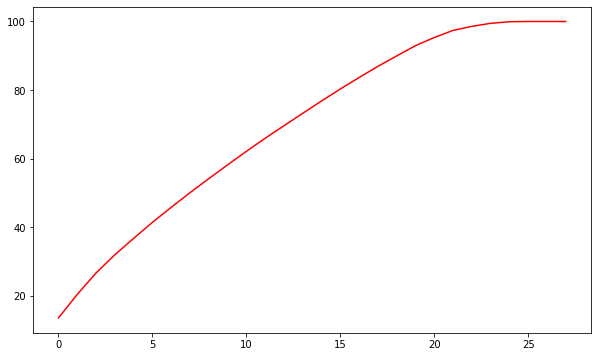

In [270]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(var1,color='red')

In [271]:
#24 pcs outoff 28 for further procedure ::-

In [272]:
finaldf=pd.concat([pd.DataFrame(pca_values[:,0:24],columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7',
                                                             'pc8','pc9','pc10','pc11','pc12','pc13','pc14',
                                                             'pc15','pc16','pc17','pc18','pc19','pc20','pc21',
                                                             'pc22','pc23','pc24']),
                 df[['size_category']]], axis = 1)
finaldf.size_category.replace(('large','small'),(1,0),inplace=True)
finaldf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,...,pc16,pc17,pc18,pc19,pc20,pc21,pc22,pc23,pc24,size_category
0,3.766709,-1.320255,-0.843971,-1.994738,-1.453359,0.693985,0.308104,-0.019764,0.010161,-0.437314,...,-0.197543,-0.021839,0.688958,0.563603,-0.439596,-0.926619,-0.405425,-0.118719,-0.017933,0
1,0.390786,0.831062,-1.101365,1.400671,2.869388,0.965898,-2.795574,0.041095,-0.548879,0.104500,...,-2.503167,0.499649,0.563706,-0.703319,-1.535718,-0.892995,0.836590,0.204975,0.290771,0
2,0.690416,1.177746,-1.221998,2.442038,1.090630,0.390801,-1.586675,-2.159336,-0.090580,0.260888,...,-2.545144,-0.658411,-0.423618,0.860550,-1.195230,-0.297870,0.743648,0.081757,0.345915,0
3,3.359951,-1.161443,0.385728,-2.118328,-1.949601,1.027664,-0.179422,-0.250227,-0.620329,-1.343189,...,-0.040887,0.017843,0.332572,1.164745,-1.632741,-0.817618,1.523710,-0.342302,-0.378420,0
4,2.974329,-0.842626,1.327788,0.038086,-1.124763,-0.574676,-0.777155,0.303635,0.861126,-2.024719,...,0.844431,1.014944,-0.618231,0.822853,-1.794109,-0.723371,2.020419,-0.545591,0.161735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,-0.087560,0.153964,1.241810,1.536581,0.372425,-1.133422,-0.362287,0.766946,0.818745,-0.289632,...,0.300522,0.513876,0.539642,-0.052958,1.898628,-1.441786,-0.821192,-1.205707,-0.698666,1
513,0.794366,-0.083966,2.670485,0.284995,0.223323,-0.904232,-0.014849,0.107226,1.340049,-0.147246,...,0.342367,0.485571,0.580150,0.384984,0.086251,-0.970693,-1.353365,-1.254890,-1.212175,1
514,0.921634,-0.264543,2.719216,-0.019643,0.242195,-0.966939,-0.118080,0.123010,1.290364,-0.177553,...,0.332816,0.344047,0.122409,0.313948,0.211157,-0.777731,-1.736711,-1.154127,-1.230040,1
515,-1.620549,-0.978838,0.331987,1.256638,-0.408164,0.735698,0.815510,-1.398344,0.076379,-0.005814,...,-0.011739,-1.035533,-0.774382,-0.216315,0.515791,0.080575,-0.055548,-0.067502,-0.311027,0


In [273]:
#split the data into x and y
array=finaldf.values
x=array[:,0:24]
y=array[:,24]

Iteration 1

In [274]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

In [275]:
model=Sequential()
model.add(Dense(12,input_dim=24,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(x,y, validation_split=0.3,epochs=150,batch_size=10)

Epoch 1/150
37/37 [==============================] - 1s 7ms/step - loss: 0.6966 - accuracy: 0.5956 - val_loss: 0.6619 - val_accuracy: 0.6218
Epoch 2/150
37/37 [==============================] - 0s 3ms/step - loss: 0.6438 - accuracy: 0.7119 - val_loss: 0.6493 - val_accuracy: 0.6474
Epoch 3/150
37/37 [==============================] - 0s 2ms/step - loss: 0.6086 - accuracy: 0.7673 - val_loss: 0.6406 - val_accuracy: 0.6667
Epoch 4/150
37/37 [==============================] - 0s 2ms/step - loss: 0.5809 - accuracy: 0.7673 - val_loss: 0.6367 - val_accuracy: 0.6731
Epoch 5/150
37/37 [==============================] - 0s 2ms/step - loss: 0.5598 - accuracy: 0.7673 - val_loss: 0.6375 - val_accuracy: 0.6731
Epoch 6/150
37/37 [==============================] - 0s 3ms/step - loss: 0.5405 - accuracy: 0.7673 - val_loss: 0.6336 - val_accuracy: 0.6923
Epoch 7/150
37/37 [==============================] - 0s 3ms/step - loss: 0.5245 - accuracy: 0.7729 - val_loss: 0.6408 - val_accuracy: 0.6923
Epoch 8/150
3

In [278]:
#accuracy of model
scores=model.evaluate(x,y)

17/17 [==============================] - 0s 1ms/step - loss: 0.2581 - accuracy: 0.9497


In [279]:
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 94.97%


Iteration 2 ::

In [280]:
model1=Sequential()
model1.add(Dense(12,input_dim=24,activation='sigmoid'))
model1.add(Dense(8,activation='sigmoid'))
model1.add(Dense(1,activation='relu'))
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model1.fit(x, y, validation_split=0.3, epochs=100, batch_size=15)

Epoch 1/100
25/25 [==============================] - 1s 8ms/step - loss: 0.5893 - accuracy: 0.7175 - val_loss: 0.8931 - val_accuracy: 0.6731
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5534 - accuracy: 0.7535 - val_loss: 0.8197 - val_accuracy: 0.6795
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.5483 - accuracy: 0.7562 - val_loss: 0.9535 - val_accuracy: 0.6795
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5347 - accuracy: 0.7562 - val_loss: 0.9461 - val_accuracy: 0.6795
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5270 - accuracy: 0.7590 - val_loss: 0.8631 - val_accuracy: 0.6795
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5238 - accuracy: 0.7590 - val_loss: 0.8522 - val_accuracy: 0.6795
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5174 - accuracy: 0.7618 - val_loss: 0.9520 - val_accuracy: 0.6859
Epoch 8/100
2

In [282]:
#model accuracy
scores1=model1.evaluate(x,y)
print("%s: %.2f%%" % (model1.metrics_names[1], scores1[1]*100))

17/17 [==============================] - 0s 1ms/step - loss: 0.4586 - accuracy: 0.8530
accuracy: 85.30%


In [283]:
model2=Sequential()
model2.add(Dense(12,input_dim=24,activation='relu'))
model2.add(Dense(8,activation='relu'))
model2.add(Dense(1,activation='relu'))
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model2.fit(x,y,epochs=100, validation_split=0.3,batch_size=15)

Epoch 1/100
25/25 [==============================] - 1s 8ms/step - loss: 3.7687 - accuracy: 0.5845 - val_loss: 3.5452 - val_accuracy: 0.6154
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 3.0573 - accuracy: 0.6288 - val_loss: 3.2212 - val_accuracy: 0.6218
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 2.8653 - accuracy: 0.6482 - val_loss: 3.1528 - val_accuracy: 0.6218
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 2.7045 - accuracy: 0.6399 - val_loss: 3.1250 - val_accuracy: 0.6090
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 2.6493 - accuracy: 0.6427 - val_loss: 3.1205 - val_accuracy: 0.6090
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 2.6342 - accuracy: 0.6454 - val_loss: 3.1186 - val_accuracy: 0.6154
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 2.6235 - accuracy: 0.6482 - val_loss: 3.1189 - val_accuracy: 0.6154
Epoch 8/100
2

In [284]:
#model accuracy
scores2=model2.evaluate(x,y)
print("%s: %.2f%%" % (model2.metrics_names[1], scores2[1]*100))

17/17 [==============================] - 0s 2ms/step - loss: 1.0138 - accuracy: 0.7930
accuracy: 79.30%


In [285]:
model3=Sequential()
model3.add(Dense(12,input_dim=24,activation='relu'))
model3.add(Dense(8,activation='relu'))
model3.add(Dense(1,activation='relu'))
model3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model3.fit(x,y,epochs=150, validation_split=0.3,batch_size=10)

Epoch 1/150
37/37 [==============================] - 1s 6ms/step - loss: 2.1075 - accuracy: 0.6704 - val_loss: 2.9816 - val_accuracy: 0.6218
Epoch 2/150
37/37 [==============================] - 0s 2ms/step - loss: 1.9109 - accuracy: 0.6814 - val_loss: 2.8900 - val_accuracy: 0.6282
Epoch 3/150
37/37 [==============================] - 0s 3ms/step - loss: 1.6885 - accuracy: 0.6814 - val_loss: 2.6440 - val_accuracy: 0.6154
Epoch 4/150
37/37 [==============================] - 0s 2ms/step - loss: 1.5726 - accuracy: 0.6842 - val_loss: 2.6270 - val_accuracy: 0.6154
Epoch 5/150
37/37 [==============================] - 0s 4ms/step - loss: 1.5300 - accuracy: 0.7008 - val_loss: 2.6229 - val_accuracy: 0.6218
Epoch 6/150
37/37 [==============================] - 0s 3ms/step - loss: 1.5055 - accuracy: 0.7147 - val_loss: 2.4782 - val_accuracy: 0.6282
Epoch 7/150
37/37 [==============================] - 0s 2ms/step - loss: 1.4937 - accuracy: 0.7341 - val_loss: 2.4756 - val_accuracy: 0.6410
Epoch 8/150
3

In [286]:
scores3 = model3.evaluate(x, y)
print("%s: %.2f%%" % (model3.metrics_names[1], scores3[1]*100))

17/17 [==============================] - 0s 1ms/step - loss: 1.0309 - accuracy: 0.8956
accuracy: 89.56%


In [288]:
#we can analyse that the best of all iteration is first one where accuracy of the system came as 94.97%